## Explorating the Tree of Life

<table><tr><td>
<img src="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391" width=200><a href="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391">source</a></td><td><img src="http://www.greennature.ca/greennature/taxonomy/tree_of_life.png" width=300><a href="http://www.greennature.ca/greennature/taxonomy/tree_of_life.png">source</a></td></tr></table>

In this hands-on exercise, you answer the following questions by using pandas data structures and methods to analyze the eukaryote genome data store in the following tab-delimited file. https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv

In [ ]:
import pandas as pd
%matplotlib inline

# this input file is tab-delimited instead of comma-delimited
tsvFile = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv"
# Load the csv file into a dataframe
euk = pd.read_csv(tsvFile, sep="\t")
euk

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
0,Emiliania huxleyi CCMP1516,Protists,Other Protists,167.676000,64.5,38549,38554,2013,Scaffold
1,Arabidopsis thaliana,Plants,Land Plants,119.669000,36.0529,38311,48265,2001,Chromosome
2,Glycine max,Plants,Land Plants,979.046000,35.1153,59847,71219,2010,Chromosome
3,Medicago truncatula,Plants,Land Plants,412.924000,34.047,37603,41939,2011,Chromosome
4,Solanum lycopersicum,Plants,Land Plants,828.349000,35.6991,31200,37660,2010,Chromosome
...,...,...,...,...,...,...,...,...,...
8297,Saccharomyces cerevisiae,Fungi,Ascomycetes,3.993920,38.2,-,-,2017,Scaffold
8298,Saccharomyces cerevisiae,Fungi,Ascomycetes,0.586761,38.5921,155,298,1992,Chromosome
8299,Saccharomyces cerevisiae,Fungi,Ascomycetes,12.020400,38.2971,-,-,2018,Chromosome
8300,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.960900,38.2413,-,-,2018,Chromosome


## Q1. How many Mammals have at least 20,000 genes? What are their scientific names? 
*Note:* 
- *Mammals are under Class*
- *Scientific names are under Species*


In [ ]:
# Your code here . . .
euk["Number of genes"] = pd.to_numeric(euk["Number of genes"], errors = 'coerce')
euk[(euk.Class == 'Mammals') & (euk['Number of genes']  < 20000)].Species

2178      Lynx pardinus
4954    Pan troglodytes
5738    Pan troglodytes
Name: Species, dtype: object

### Q2. Animals are a part of Kingdom. How many records are there for each Class of Animals?

In [ ]:
# Your code here . . .
euk[(euk.Kingdom == 'Animals')]


,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
34,Caenorhabditis briggsae,Animals,Roundworms,108.38400,37.6966,22736.0,21959,2002,Chromosome
35,Caenorhabditis elegans,Animals,Roundworms,100.28600,35.4317,46857.0,28420,2001,Complete Genome
36,Brugia malayi,Animals,Roundworms,93.65910,31.499,11441.0,11472,2002,Scaffold
37,Aedes aegypti,Animals,Insects,1278.73000,38.1667,19339.0,28317,2017,Chromosome
38,Aedes albopictus,Animals,Insects,2247.31000,40.3999,38274.0,42912,2016,Contig
...,...,...,...,...,...,...,...,...,...
7783,Homo sapiens,Animals,Mammals,4.89807,44.6,NaN,-,2017,Scaffold
7784,Homo sapiens,Animals,Mammals,2.09690,45.8,NaN,-,2017,Scaffold
7789,Homo sapiens,Animals,Mammals,4.78084,44.6,NaN,-,2017,Scaffold
7790,Homo sapiens,Animals,Mammals,4.79943,44.6,NaN,-,2017,Scaffold


### Q3. Animals are a part of Kingdom. How many unique Species are there for each Class of Animals?

In [ ]:
# Your code here . . .
euk[(euk.Kingdom == 'Animals')].Species.nunique()

1442

### Q4. What are the unique scientific names of Mammals with the genus name Macaca?
*Recall: the scientific name starts with genus followed by a space and then the species name. Example: Homo sapiens.*

In [ ]:
# Your code here . . .

Macaca_data = euk[(euk.Species.str.split(' ').str[0] == "Macaca")]
Macaca_data

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
119,Macaca mulatta,Animals,Mammals,3236.2200,41.2014,33215.0,55363,2014,Chromosome
306,Macaca fascicularis,Animals,Mammals,2946.8400,41.3398,33107.0,62703,2013,Chromosome
1116,Macaca nemestrina,Animals,Mammals,2948.7000,41.3,40715.0,66484,2015,Scaffold
1845,Macaca fuscata fuscata,Animals,Mammals,2930.7100,40.9,NaN,-,2018,Contig
4856,Macaca fascicularis,Animals,Mammals,2878.4700,41.2655,NaN,-,2011,Chromosome
4948,Macaca mulatta,Animals,Mammals,3097.3900,38.0268,NaN,-,2006,Chromosome
5087,Macaca mulatta,Animals,Mammals,2969.9700,41.8692,21524.0,17802,2011,Chromosome
5152,Macaca fascicularis,Animals,Mammals,3126.5600,42.0609,21132.0,17456,2011,Chromosome
5646,Macaca mulatta,Animals,Mammals,2971.3100,41.1015,NaN,-,2015,Chromosome
5740,Macaca mulatta,Animals,Mammals,11.7537,40.1,NaN,-,2015,Chromosome


### Q5. Modify the Species names to only contain the scientific names  and create a new dataframe.

Some of the names in the Species column have more than two parts, such as `Emiliania huxleyi CCMP1516`. Create a new column Species that contains only the first two parts of name, such as `Emiliania huxleyi`. Combine this new Species column with `Kingdom`, `Class`, `Size (Mb)`, `Number of genes`, and `Number of proteins`.

Hint: Follow Q3 in Lecture 4 with a little twist. Instead of just getting the first element from the split results, you will get the first two elements using .str[0:2] which will give you a list. You can then use .str.join(" ") to change it back to a string.

In [ ]:
# Your code here . . .
#euk.Species.str.split().str[0:2].str.join(" ")
euk['Species']=euk.Species.str.split().str[0:2].str.join(" ")
neweuk = euk[["Kingdom","Species","Class","Size (Mb)","Number of genes", "Number of proteins"]]
neweuk

,Kingdom,Species,Class,Size (Mb),Number of genes,Number of proteins
0,Protists,Emiliania huxleyi,Other Protists,167.676000,38549.0,38554
1,Plants,Arabidopsis thaliana,Land Plants,119.669000,38311.0,48265
2,Plants,Glycine max,Land Plants,979.046000,59847.0,71219
3,Plants,Medicago truncatula,Land Plants,412.924000,37603.0,41939
4,Plants,Solanum lycopersicum,Land Plants,828.349000,31200.0,37660
...,...,...,...,...,...,...
8297,Fungi,Saccharomyces cerevisiae,Ascomycetes,3.993920,NaN,-
8298,Fungi,Saccharomyces cerevisiae,Ascomycetes,0.586761,155.0,298
8299,Fungi,Saccharomyces cerevisiae,Ascomycetes,12.020400,NaN,-
8300,Fungi,Saccharomyces cerevisiae,Ascomycetes,11.960900,NaN,-


### Q6. Create a pie plot using pandas to show the number of unique Species in each Class of Animals using the new dataframe you created in Q5
Hint: First, create a new dataframe that contains the number of unique Species and the index is the corresponding Animals Class. Then, use that dataframe to plot the pie plot.
[Check out this documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html)

In [ ]:
# Create a new dataframe that contains the number of unique Species and 
# the index is the corresponding Animals Class.

# Your code here . . .
neweuk = euk[["Kingdom","Species","Class","Size (Mb)","Number of genes", "Number of proteins"]]
#neweuk = euk[(euk.Kingdom == 'Animals')]
animals = neweuk.iloc[:,2]
animals


0       Other Protists
1          Land Plants
2          Land Plants
3          Land Plants
4          Land Plants
             ...      
8297       Ascomycetes
8298       Ascomycetes
8299       Ascomycetes
8300       Ascomycetes
8301       Ascomycetes
Name: Class, Length: 8302, dtype: object

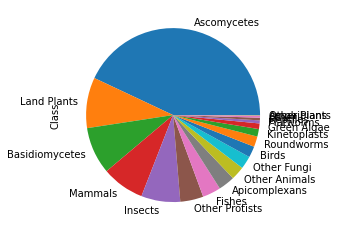

In [ ]:
# Create a panda pie plot using the dataframe above

# Your code here . . .

animals.value_counts().plot(kind='pie')
